 # <center> Introduction to Machine Learning </center>


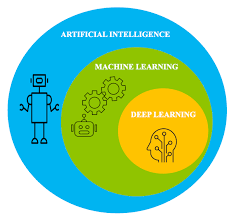

Machine learning is a subset of artificial intelligence that applies statistical principles to teach a computer to learn patterns from data without being explicitly programmed to do so.

# Machine Learning Methods

* Supervised Learning: the computer is told what the correct answers are.
* Unsupervised Learning: the computer tries to understand the data by itself.

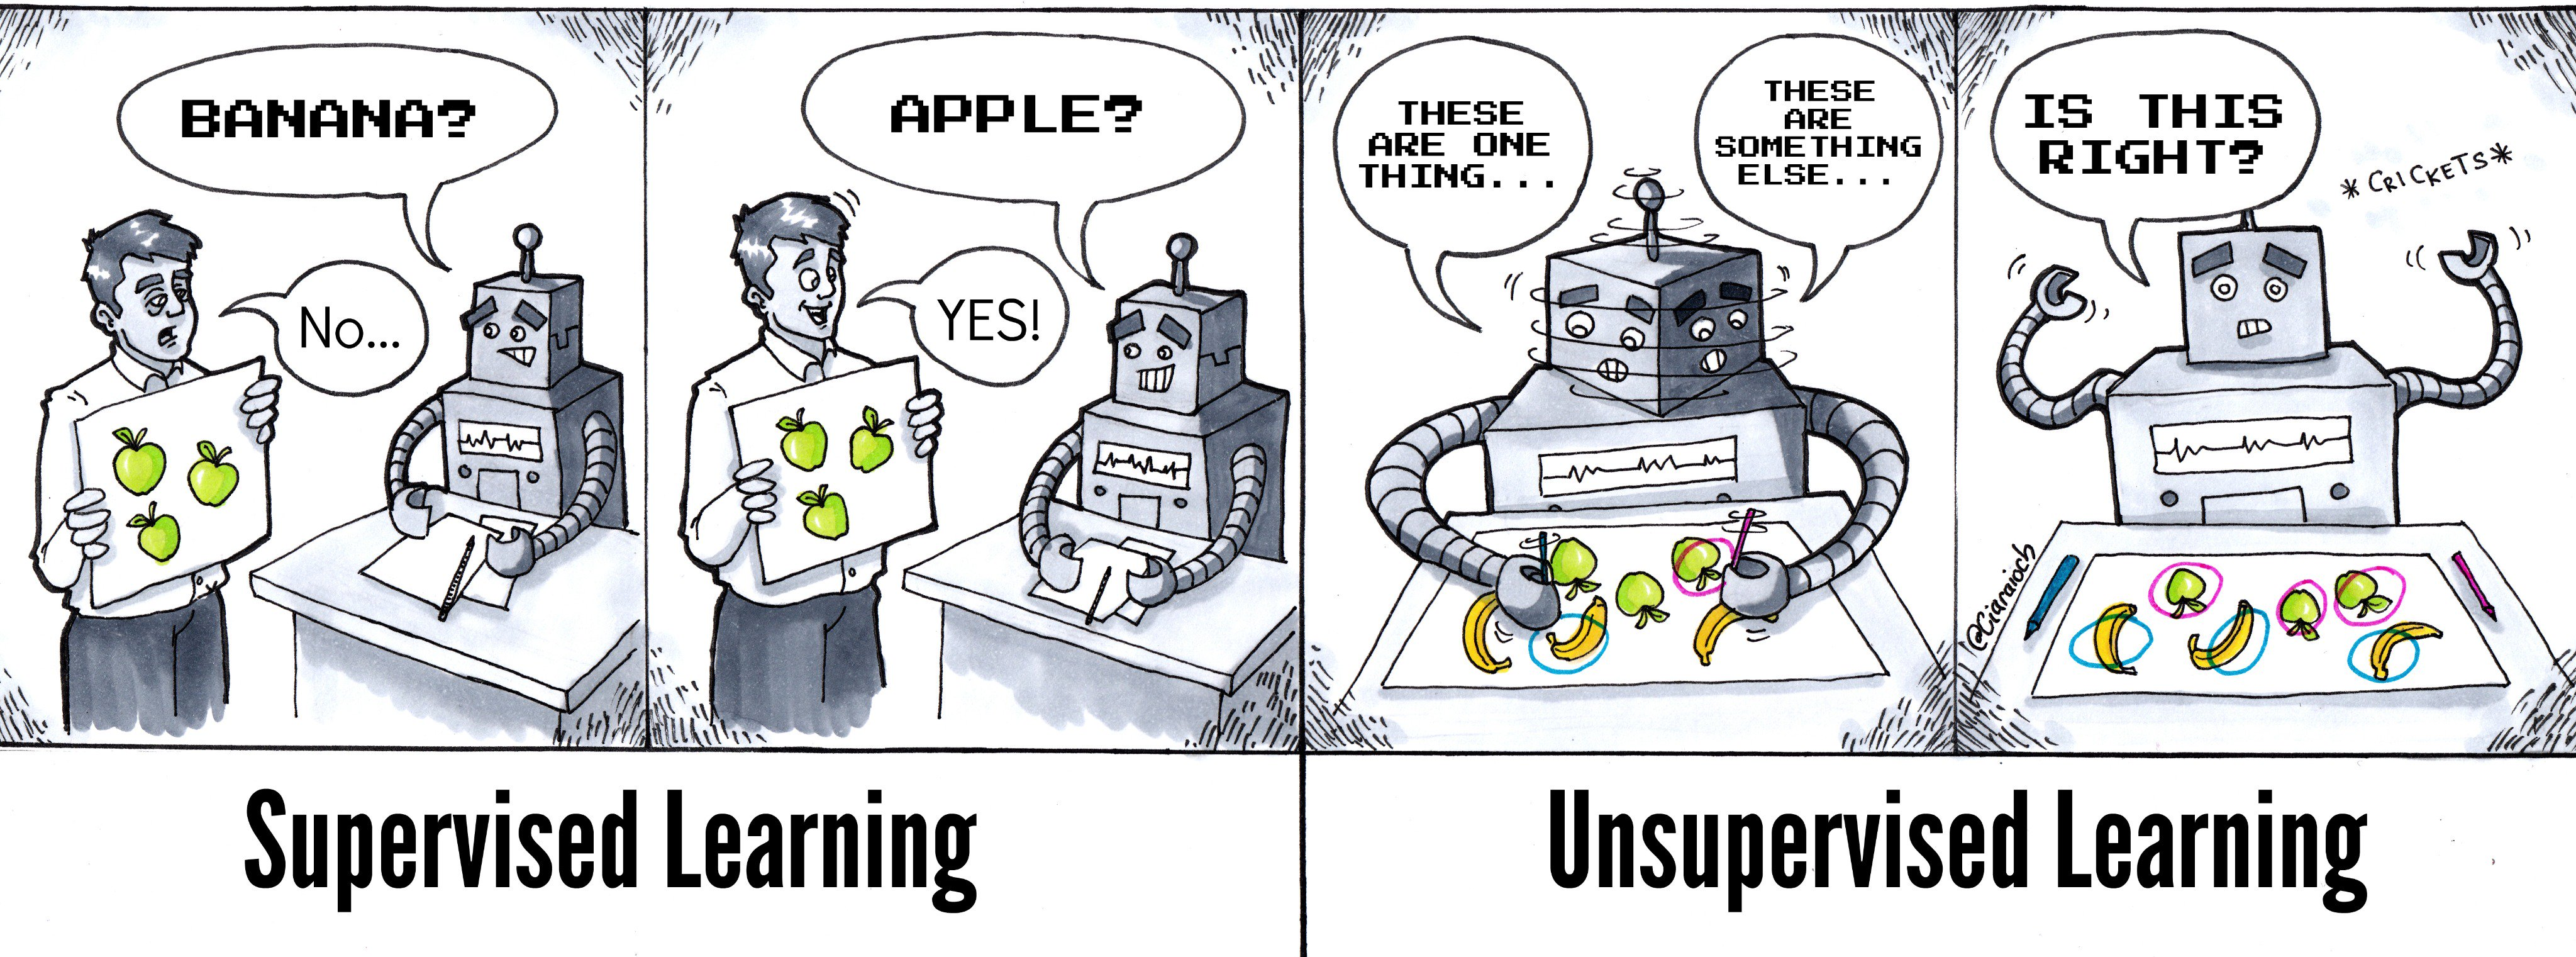

## Supervised Learning Tasks
* Classification: categorical values such as loan default (Yes/No), disease detection (Positive/Negative)...
* Regression: continuous values such as house prices, car prices, height....

## Unsupervised Learning Tasks
* Clustering: customer segmentation.....

## Supervised Learning Algorithms
* Decision Trees (Regression/Classification)
* Linear Regression (Regression)
* Logistic Regression (Classification)
* Random Forest (Regression/Classification

## Unsupervised Learning Algorithms
* K-Means
* Principal Component Analysis

# Predicting Lagos House Prices
## A Regression Task

In this task, we introduce you to Decision Trees

In [3]:
#import pandas library
import pandas as pd

import seaborn as sns

#load the dataset
lagos_houses = pd.read_csv('lagos_house_prices_raw.csv')

In [4]:
lagos_houses.head()

location  bed  bath  toilet     price    Property_Type  Parking_Space  \
0     yaba    1     1       2  700000.0        Mini flat              0   
1     yaba    1     1       2  700000.0        Mini flat              0   
2     yaba    1     1       2  650000.0        Mini flat              0   
3     yaba    1     1       1  450000.0        Mini flat              0   
4     yaba    3     3       4  800000.0  Detached duplex              0   

   Security  Electricity  Furnished  Security_Doors  CCTV  Pool  Gym  BQ  
0         0            0          0               0     0     0    0   0  
1         0            0          0               0     0     0    0   0  
2         0            0          0               0     0     0    0   0  
3         0            0          0               0     0     0    0   0  
4         1            0          0               0     0     0    0   0

In [7]:
lagos_houses.tail()

location  bed  bath  toilet      price         Property_Type  \
5331     ajah    1     1       2   600000.0             Mini flat   
5332     ajah    2     2       2   700000.0             Mini flat   
5333     ajah    4     4       5  1700000.0  Semi detached duplex   
5334     ajah    1     1       2   500000.0             Mini flat   
5335     ajah    4     4       5  1800000.0  Semi detached duplex   

      Parking_Space  Security  Electricity  Furnished  Security_Doors  CCTV  \
5331              1         0            0          0               0     0   
5332              1         0            0          0               0     0   
5333              1         0            0          0               0     0   
5334              0         0            0          0               0     0   
5335              1         1            0          1               0     0   

      Pool  Gym  BQ  
5331     0    0   0  
5332     0    0   0  
5333     0    0   0  
5334     0    0   0  
5335     0    0   0

In [6]:
lagos_houses.shape #shape consist of the rows and columns

(5336, 15)

In [9]:
#use describe() to see summary statistics of numeric columns

lagos_houses.describe().astype(int)  #the astype method changed the floats to integers

bed  bath  toilet    price  Parking_Space  Security  Electricity  \
count  5336  5336    5336     5336           5336      5336         5336   
mean      1     1       1   645566              0         0            0   
std       0     0       0   469305              0         0            0   
min       1     1       1      150              0         0            0   
25%       1     1       1   350000              0         0            0   
50%       1     1       1   500000              0         0            0   
75%       1     2       2   800000              0         0            0   
max       5     5       5  2450000              1         1            1   

       Furnished  Security_Doors  CCTV  Pool   Gym    BQ  
count       5336            5336  5336  5336  5336  5336  
mean           0               0     0     0     0     0  
std            0               0     0     0     0     0  
min            0               0     0     0     0     0  
25%            0               0     0     0     0     0  
50%            0               0     0     0     0     0  
75%            0               0     0     0     0     0  
max            1               1     1     1     1     1

<AxesSubplot:>

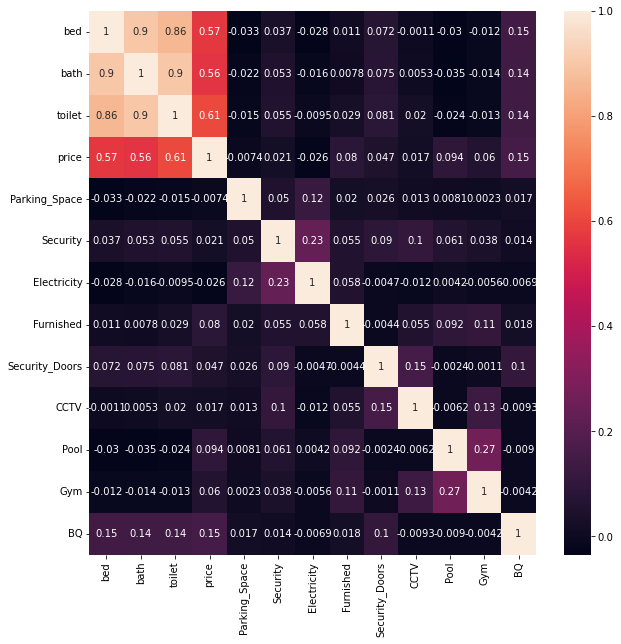

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(lagos_houses.corr(), annot = True)  #this is correlation btw each features

## Select Target

The target is what you want to predict. In this exercise we want to predict house prices.

We tend to name the target `y`

In [11]:
#choose your target variable. Normally we call it y

y = lagos_houses.price

In [12]:
#another way to select the column is like this:
y = lagos_houses['price']

In [13]:
#view the top few rows of y
y.head()

0    700000.0
1    700000.0
2    650000.0
3    450000.0
4    800000.0
Name: price, dtype: float64

## Select Features

Normally you don't need to use all the columns in your data frame to predict your target. Feature selection is where you choose the features that you will use to train your model.

We tend to call the training data `X`

In [14]:
#view the column names
lagos_houses.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [15]:
#or
lagos_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [16]:
# create a list of features. For now we want to use just numeric columns. 
# remember that price is your target so it shouldn't be in your features.


feature_columns = ['bed', 'bath', 'toilet',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ']

In [31]:
#create X by filtering the housing data with selected features
X = lagos_houses[feature_columns] 

'''
y - target
X -  features
'''

In [32]:
#view the first few rows of X
X.head()

bed  bath  toilet  Parking_Space  Security  Electricity  Furnished  \
0    1     1       2              0         0            0          0   
1    1     1       2              0         0            0          0   
2    1     1       2              0         0            0          0   
3    1     1       1              0         0            0          0   
4    3     3       4              0         1            0          0   

   Security_Doors  CCTV  Pool  Gym  BQ  
0               0     0     0    0   0  
1               0     0     0    0   0  
2               0     0     0    0   0  
3               0     0     0    0   0  
4               0     0     0    0   0

## Your First Machine Learning Model

In [19]:
#import the model from scikit learn
from sklearn.tree import DecisionTreeRegressor


In [20]:
#create an instance of the model
lagos_model = DecisionTreeRegressor(random_state=42) #the specific number 42 is so that the answers have uniformity

#but it can be any number

In [21]:
#fit your model to your data, i.e. train your model

lagos_model.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [25]:
#predict house prices

preds = lagos_model.predict(X)   #don't use this model, you could get sacked

In [23]:
#for knowledge sake, compare actual prices with predicted prices
#remember y contains actual prices and preds contains the predicted prices

print('Actual prices:', y.head().tolist())
print('Predicted prices:', preds[:5])

Actual prices: [700000.0, 700000.0, 650000.0, 450000.0, 800000.0]
Predicted prices: [ 714471.74447174  714471.74447174  714471.74447174  460478.95208071
 1477500.        ]


It appears our predictions are close to actual values. We can use statistical metrics to evaluate the model. 

One such metric is mean absolute error. 


## Evaluate Model with Mean Absolute Error

If the actual price of a house is N750,000 but our model predicts N800,000 the difference is N50,000.

Statistically we can call that the error.

Mean absolute error is the mean of all such errors in the range of predicted values.

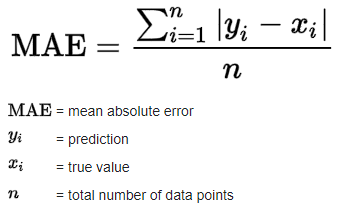

Programmatically, we can evaluate this using `mean_absolute_error` from scikit learn library.

In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y,preds)
print(mae)

239587.33686843375


This means that on average, the difference between the true house price and our prediction is about N239,587.



* MSE ?
* Validation (train and test splits)
* Random Forest
* Check improvement when using random forest
* Overfitting vs Underfitting

* Cross validation (next class)
* MAE vs MSE vs RMSE


## Validation



In [36]:
#import train test split
from sklearn.model_selection import train_test_split

In [37]:
#split your data into training and testing sets
# 70:30, 60:40 are common splits
'''
test is for knowing how the model performs on unseen data
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (3735, 12)
X_test:  (1601, 12)
y_train:  (3735,)
y_test:  (1601,)


In [40]:
#retrain model

lagos_model.fit(X_train,y_train)

#predict on the test data
preds2 = lagos_model.predict(X_test)


In [41]:
#manually compare

print(y_test.head().tolist())
print(preds2[:5])

[2200000.0, 2000000.0, 1500000.0, 200000.0, 250000.0]
[1764285.71428571 1057264.95726496 1280100.          476057.14285714
  452708.33333333]


In [43]:
#get mean absolute error

mae2 = mean_absolute_error(y_test,preds2)

print('Without splitting',mae)
print('With splitting',mae2)

'''splitting talks about the ML predicting from the unknown; which is unreliable
hence, we need to use something else e.g random forest'''

Without splitting 239587.33686843375
With splitting 254237.91012358194


'splitting talks about the ML predicting from the unknown; which is unreliable\nhence, we need to use something else e.g random forest'

## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

lagos_RF_model = RandomForestRegressor()

In [45]:
#fit your model on the training data
lagos_RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
#predict on test data
preds_RF = lagos_RF_model.predict(X_test)

In [47]:
#manually compare

print(y_test.head().tolist())
print(preds_RF[:5])

[2200000.0, 2000000.0, 1500000.0, 200000.0, 250000.0]
[1762732.49662188 1061962.90837818 1278750.60952327  475048.45527506
  453012.93451531]


In [48]:
#calculate error
mae_RF = mean_absolute_error(y_test,preds_RF)

print('Decision tree with train test split: ',mae2)
print('Random Forest with train test split: ',mae_RF) 



Decision tree with train test split:  254237.91012358194
Random Forest with train test split:  252440.4533322051


In [49]:
pd.Series(preds_RF).astype(int).head()

0    1762732
1    1061962
2    1278750
3     475048
4     453012
dtype: int32